<a href="https://colab.research.google.com/github/initiative1972/Machine-Learning-Portfolio/blob/Machine-Learning-in-Retails-%26-Ecommerce/Customer_segmentation_Kaggle_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Machine Learning Model

We develop a machine learning model for customer segmentation to:

1. Perform customer segmentation;
2. And predict what new customer will buy in the next year.

## **Import libraries**

In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
import plotly.express as px
#from plotly.offline import init_notebook_mode,iplot
#init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
#plt.rcParams["patch.force_edgecolor"] = True
#plt.style.use('fivethirtyeight')
#mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

##   Data Preparation 

In [4]:
# read the datafile
# df_initial = pd.read_csv('https://raw.githubusercontent.com/firmai/python-business-analytics/master/data/customer/data.csv',encoding="ISO-8859-1",
#                          dtype={'CustomerID': str,'InvoiceID': str})

df_initial = pd.read_csv('./data.csv')
print('Dataframe dimensions:', df_initial.shape)
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])

Dataframe dimensions: (63067, 8)


In [6]:
# show first lines
df_initial.columns = ['order_ID', 'inventory_ID', 'desc', 'amount', 'order_date', 'unit_price', 'customer_ID', 'country']
display(df_initial[:5])

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,2011-07-08 16:11:00,1.63,NaN,United Kingdom
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,2011-07-08 16:11:00,3.29,NaN,United Kingdom
2,559518,22179,SET 10 NIGHT OWL LIGHTS,1,2011-07-08 16:11:00,13.29,NaN,United Kingdom
3,559518,22297,HEART IVORY TRELLIS SMALL,1,2011-07-08 16:11:00,2.46,NaN,United Kingdom
4,559518,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,2011-07-08 16:11:00,4.96,NaN,United Kingdom


In [ ]:
# df_initial.columns = ['订单编号', '库存代码', '描述', '数量', '订单日期', '单价', '客户ID', '国家']

In [7]:
df_initial.head()

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
0,559518,21989,PACK OF 20 SKULL PAPER NAPKINS,6,2011-07-08 16:11:00,1.63,NaN,United Kingdom
1,559518,22055,MINI CAKE STAND HANGING STRAWBERY,1,2011-07-08 16:11:00,3.29,NaN,United Kingdom
2,559518,22179,SET 10 NIGHT OWL LIGHTS,1,2011-07-08 16:11:00,13.29,NaN,United Kingdom
3,559518,22297,HEART IVORY TRELLIS SMALL,1,2011-07-08 16:11:00,2.46,NaN,United Kingdom
4,559518,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,2011-07-08 16:11:00,4.96,NaN,United Kingdom


In [8]:
df_initial.tail()

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
63062,564974,21933,PINK VINTAGE PAISLEY PICNIC BAG,2,2011-08-31 15:32:00,2.46,NaN,United Kingdom
63063,564974,21934,SKULL SHOULDER BAG,10,2011-08-31 15:32:00,1.63,NaN,United Kingdom
63064,564974,21935,SUKI SHOULDER BAG,7,2011-08-31 15:32:00,1.63,NaN,United Kingdom
63065,564974,21936,RED RETROSPOT PICNIC BAG,1,2011-08-31 15:32:00,5.79,NaN,United Kingdom
63066,564974,21975,PACK OF 60 DINOSAUR CAKE CASES,1,2011-08-31 15:03:00,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

### Analysis of missing values

In [9]:
# Provide information of missing data and dtype
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'dtype'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null_value(nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null_value(%)'}))
print ('-' * 10 + " Display information of missing data and dtype " + '-' * 10 )
print 
display(tab_info)

---------- Display information of missing data and dtype ----------


,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
dtype,object,object,object,int64,datetime64[ns],float64,float64,object
null_value(nb),0,0,193,0,0,1,14714,1
null_value(%),0.0,0.0,0.306024,0.0,0.0,0.001586,23.330743,0.001586


### Drop missing values


In [10]:
# Remove the null values of customer_ID (around 22%)
df_initial.dropna(axis = 0, subset = ['customer_ID'], inplace = True)
print('Dataframe dimension:', df_initial.shape)
# Provide information of missing data and dtype
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'dtype'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null_value(nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null_value(%)'}))
display(tab_info)

Dataframe dimension: (48353, 8)


,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
dtype,object,object,object,int64,datetime64[ns],float64,float64,object
null_value(nb),0,0,0,0,0,0,0,0
null_value(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Remove duplicate values
print('Duplicate data records: {}'.format(df_initial.duplicated().sum()))
df_initial.drop_duplicates(inplace = True)

Duplicate data records: 397


### Explore attribute
---

#### Explore attribute: country

In [12]:
temp = df_initial[['customer_ID','order_ID', 'country']].groupby(
    ['customer_ID','order_ID', 'country']).count()
temp = temp.reset_index(drop = False)
countries = temp['country'].value_counts()
print('Number of countries: {}'.format(len(countries)))

Number of countries: 27


In [13]:
temp.head(5)

,customer_ID,order_ID,country
0,12347.0,562032,Iceland
1,12358.0,559707,Austria
2,12360.0,563749,Austria
3,12362.0,563037,Belgium
4,12362.0,C563752,Belgium


In [14]:
countries

United Kingdom        2403
Germany                 78
France                  45
EIRE                    44
Spain                   14
Switzerland             13
Belgium                 13
Australia               11
Netherlands             11
Sweden                   8
Italy                    8
Finland                  6
Channel Islands          6
Unspecified              5
Poland                   5
Portugal                 5
Austria                  4
Malta                    3
Japan                    3
Canada                   3
Denmark                  3
Norway                   3
Greece                   2
Israel                   2
Singapore                1
European Community       1
Iceland                  1
Name: country, dtype: int64

In [15]:
# colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'SkyBlue','LimeGreen','pink','lightgray']
import plotly.graph_objs as go
import plotly.express as px
fig=go.Figure()
fig.add_trace(go.Bar(
    x=countries.index,
    y=countries.values,
    name='By country',
    marker_color='#4682B4',
    textposition='outside',
    text=countries.values,
#     textangle = 30,
))

fig.update_traces(texttemplate='%{text}', 
#                   marker_color=colors, 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
#     title='Amount of Orders by Country',
#     xaxis_title="City",
#     yaxis_title="Salary(dollar)",
    template='ggplot2',
    font=dict(
        size=12,
        color="Black",
        
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor="#fafafa"
)

fig.show()


In [16]:
temp_no_of_order_per_count = df_initial[['customer_ID', 'country']].groupby(['country']).count()
temp_no_of_order_per_count = temp_no_of_order_per_count.reset_index(drop = False)

print('-' * 10 + " Sorted by amount of orders by country "+ '-' * 10)
print
print(temp_no_of_order_per_count.sort_values(
    by='customer_ID', ascending=False).rename(index=str,
                                        columns={'customer_ID': "order_by_country"}))

---------- Sorted by amount of orders by country ----------
               country  order_by_country
25      United Kingdom             41272
10             Germany              1412
6                 EIRE              1203
9               France               823
22               Spain               360
24         Switzerland               358
0            Australia               324
17         Netherlands               294
2              Belgium               273
13              Israel               198
26         Unspecified               169
1              Austria               143
4      Channel Islands               140
20            Portugal               131
18              Norway               126
8              Finland               125
14               Italy               107
3               Canada                83
21           Singapore                75
23              Sweden                74
16               Malta                57
19              Poland                

In [17]:
df_c = temp_no_of_order_per_count.sort_values(by='customer_ID', ascending=False
                                             ).rename(index=str, columns={'customer_ID': "order_by_country"})
df_c.head()

,country,order_by_country
25,United Kingdom,41272
10,Germany,1412
6,EIRE,1203
9,France,823
22,Spain,360


In [18]:
# colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'SkyBlue','LimeGreen','pink','lightgray']
fig=go.Figure()
fig.add_trace(go.Bar(
    x=df_c['country'],
    y=df_c['order_by_country'],
    name='order_by_country',
    marker_color='#4682B4',
    textposition='outside',
    text=df_c.order_by_country.values,
#     textangle = 30,
))

fig.update_traces(texttemplate='%{text}', 
#                   marker_color=colors, 
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
#     title='order_by_country',
#     xaxis_title="City",
#     yaxis_title="Salary(dollar)",
    template='ggplot2',
    font=dict(
        size=12,
        color="Black",
        
    ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor="#fafafa"
)

fig.show()


#### Explore attribute: Customer and Product

In [19]:
pd.DataFrame([{'product': len(df_initial['inventory_ID'].value_counts()),    
               'transaction': len(df_initial['order_ID'].value_counts()),
               'customer': len(df_initial['customer_ID'].value_counts()),  
              }], columns = ['product', 'transaction', 'customer'], 
              index = ['amount'])

,product,transaction,customer
amount,2607,2701,1410


In [20]:
temp = df_initial.groupby(by=['customer_ID', 'order_ID'],
                          as_index=False)['order_date'].count()
nb_products_per_basket = temp.rename(columns = {'order_date':'product_amount'})
nb_products_per_basket['customer_ID'] = nb_products_per_basket['customer_ID'].map(lambda x:int(x))
nb_products_per_basket[:10].sort_values('customer_ID')

,customer_ID,order_ID,product_amount
0,12347,562032,22
1,12358,559707,12
2,12360,563749,30
3,12362,563037,30
4,12362,C563752,3
5,12363,563947,7
6,12364,563854,34
7,12378,562046,219
8,12381,563100,62
9,12384,562882,14


In [21]:
nb_products_per_basket.sample(5)

,customer_ID,order_ID,product_amount
2603,18064,561858,5
1028,14527,C560842,1
2445,17723,562443,1
14,12405,559928,54
882,14201,559916,4


#### Analysis of cancelled orders

In [22]:
nb_products_per_basket['cancelled_order'] = nb_products_per_basket['order_ID'].apply(
    lambda x:int('C' in x))
display(nb_products_per_basket.query("cancelled_order != 0")[:5])

n1 = nb_products_per_basket['cancelled_order'].sum()
n2 = nb_products_per_basket.shape[0]
percentage = (n1/n2)*100
print('cancelled_order: {}/{} ({:.2f}%) '.format(n1, n2, percentage))

,customer_ID,order_ID,product_amount,cancelled_order
4,12362,C563752,3,1
15,12406,C562728,3,1
17,12409,C563224,1,1
23,12415,C560540,57,1
30,12428,C564108,1,1


cancelled_order: 446/2701 (16.51%) 


In [23]:
display(df_initial.sort_values('customer_ID').sample(5))

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
54476,564312,85099F,JUMBO BAG STRAWBERRY,200,2011-08-24 12:52:00,1.79,15769.0,United Kingdom
34589,562519,21914,BLUE HARMONICA IN BOX,1,2011-08-05 12:37:00,1.25,16764.0,United Kingdom
36704,562652,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-08-08 13:34:00,2.08,14844.0,United Kingdom
28274,561907,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-08-01 10:08:00,1.25,14060.0,United Kingdom
2538,559707,37447,CERAMIC CAKE DESIGN SPOTTED PLATE,12,2011-07-12 10:04:00,1.49,12358.0,Austria


In [28]:
display(df_initial.sort_values('customer_ID').query("order_ID in ['560869', 'C560869']"))
# The desc of this order_ID is shown as "Discount".

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
16735,C560869,D,Discount,-1,2011-07-21 14:32:00,66.24,12830.0,United Kingdom


In [25]:
df_initial[df_initial['customer_ID'] == 12830]
# The desc of order_ID C560869 is shown as "Discount" and intentory_ID shown as "D".

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country
16735,C560869,D,Discount,-1,2011-07-21 14:32:00,66.24,12830.0,United Kingdom
25724,561671,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,576,2011-07-28 17:17:00,0.86,12830.0,United Kingdom
25725,561671,22550,HOLIDAY FUN LUDO,72,2011-07-28 17:17:00,2.62,12830.0,United Kingdom
25726,561671,21912,VINTAGE SNAKES & LADDERS,144,2011-07-28 17:17:00,2.62,12830.0,United Kingdom
25727,561671,23229,VINTAGE DONKEY TAIL GAME,72,2011-07-28 17:17:00,2.62,12830.0,United Kingdom
25728,561671,22548,HEADS AND TAILS SPORTING FUN,144,2011-07-28 17:17:00,0.85,12830.0,United Kingdom
25729,561671,21790,VINTAGE SNAP CARDS,288,2011-07-28 17:17:00,0.58,12830.0,United Kingdom
25730,561671,22536,MAGIC DRAWING SLATE PURDEY,192,2011-07-28 17:17:00,0.27,12830.0,United Kingdom
25731,561671,22535,MAGIC DRAWING SLATE BUNNIES,192,2011-07-28 17:17:00,0.27,12830.0,United Kingdom
25732,561671,22533,MAGIC DRAWING SLATE BAKE A CAKE,192,2011-07-28 17:17:00,0.27,12830.0,United Kingdom


In [26]:
df_check = df_initial[df_initial['amount'] < 0][['customer_ID','amount', 'inventory_ID','desc','unit_price']]
for index, col in  df_check.iterrows():
    if df_initial[(df_initial['customer_ID'] == col[0]) & (df_initial['amount'] == -col[1]) 
                & (df_initial['desc'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(25*'-'+'>'+' Hypothesis not true')
        break

customer_ID                         14808.0
amount                                   -1
inventory_ID                          22655
desc            VINTAGE RED KITCHEN CABINET
unit_price                            125.0
Name: 279, dtype: object
-------------------------> Hypothesis not true


In [27]:
df_check = df_initial[(df_initial['amount'] < 0) & (df_initial['desc'] != 'Discount')][
                                 ['customer_ID', 'amount', 'inventory_ID', 'desc', 'unit_price']]

for index, col in  df_check.iterrows():
    if df_initial[(df_initial['customer_ID'] == col[0]) & (df_initial['amount'] == -col[1]) 
                & (df_initial['desc'] == col[2])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(25*'-'+'>'+' Hyposthesis not true')
        break

279 customer_ID                         14808.0
amount                                   -1
inventory_ID                          22655
desc            VINTAGE RED KITCHEN CABINET
unit_price                            125.0
Name: 279, dtype: object
-------------------------> Hyposthesis not true


In [29]:
df_cleaned = df_initial.copy(deep = True)
df_cleaned['cancelled_order'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial.iterrows():
    if (col['amount'] > 0) or col['desc'] == 'Discount': continue        
    df_test = df_initial[(df_initial['customer_ID'] == col['customer_ID']) &
                         (df_initial['inventory_ID']  == col['inventory_ID']) & 
                         (df_initial['order_date'] < col['order_date']) & 
                         (df_initial['amount']   > 0)].copy()

    # Cancelled order ID's (negative amount) with NO correponding orders (positive amount)
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
        # store cancelled order ID's with NO correponding orders (positive amount) in doubtfull_entry
   
    # Cancelled order ID's (negative amount) with correponding orders (positive amount)
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'cancelled_order'] = -col['amount']
        entry_to_remove.append(index)
        # store cancelled order ID's with correponding orders (positive amount) in entry_to_remove        
   
    # Remove the last corresponding record
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['amount'] < -col['amount']: continue
            df_cleaned.loc[ind, 'cancelled_order'] = -col['amount']
            entry_to_remove.append(index) 
            break            

In [30]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 683
doubtfull_entry: 406


In [31]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['amount'] < 0) & (df_cleaned['inventory_ID'] != 'D')]
print("Number of records to be removed: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

Number of records to be removed: 0


,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country,cancelled_order


In [32]:
remaining_entries

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country,cancelled_order


In [33]:
df_cleaned[(df_cleaned['customer_ID'] == 14048) & (df_cleaned['inventory_ID'] == '22464')]

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country,cancelled_order


#### Analysis of inventory ID



In [34]:
# Find inventory_ID containing letters using Regex
list_special_codes = df_cleaned[df_cleaned['inventory_ID'].str.contains('^[a-zA-Z]+', regex=True)]['inventory_ID'].unique()
list_special_codes

array(['M', 'POST', 'D', 'C2', 'PADS', 'DOT'], dtype=object)

In [35]:
# List the description of the above array of inventory_ID containing letters
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['inventory_ID'] == code]['desc'].unique()[0]))

M               -> Manual                        
POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                



#### Basket price analysis


In [36]:
# Calculate total price
df_cleaned['total_price'] = df_cleaned['unit_price'] * (df_cleaned['amount'] - df_cleaned['cancelled_order'])
df_cleaned.sort_values('customer_ID')[:5]

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country,cancelled_order,total_price
29421,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,0,13.2
29430,562032,22727,ALARM CLOCK BAKELIKE RED,8,2011-08-02 08:48:00,3.75,12347.0,Iceland,0,30.0
29429,562032,20719,WOODLAND CHARLOTTE BAG,10,2011-08-02 08:48:00,0.85,12347.0,Iceland,0,8.5
29428,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,2011-08-02 08:48:00,2.25,12347.0,Iceland,0,13.5
29427,562032,22372,AIRLINE BAG VINTAGE WORLD CHAMPION,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,0,17.0


In [37]:
# Get the sum of total_price grouping by customer_ID and order_ID
temp = df_cleaned.groupby(by=['customer_ID', 'order_ID'], as_index=False)['total_price'].sum()
basket_price = temp.rename(columns = {'total_price':'basket_price'})

# Convert order_date to integer, calculate mean, and then convert back to date type
df_cleaned['order_date_int'] = df_cleaned['order_date'].astype('int64')
temp = df_cleaned.groupby(by=['customer_ID', 'order_ID'], as_index=False)['order_date_int'].mean()
df_cleaned.drop('order_date_int', axis = 1, inplace = True)
basket_price.loc[:, 'order_date'] = pd.to_datetime(temp['order_date_int'])

# Filter the important records with basket_price > 0
basket_price = basket_price[basket_price['basket_price'] > 0]
basket_price.sort_values('customer_ID')[:6]

,customer_ID,order_ID,basket_price,order_date
0,12347.0,562032,584.91,2011-08-02 08:48:00
1,12358.0,559707,484.86,2011-07-12 10:04:00
2,12360.0,563749,534.70,2011-08-19 10:10:00
3,12362.0,563037,451.35,2011-08-11 15:02:00
4,12363.0,563947,252.90,2011-08-22 10:18:00
5,12364.0,563854,623.92,2011-08-19 15:24:00


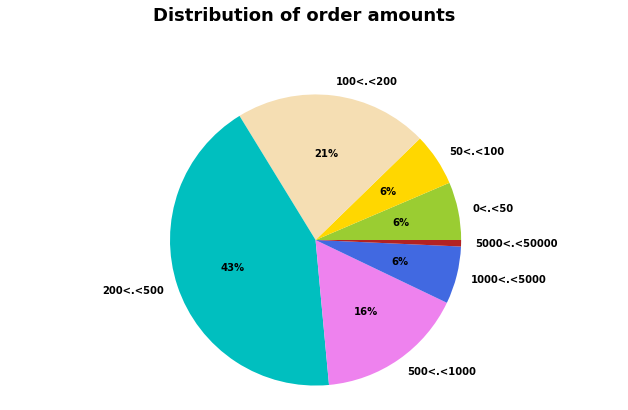

In [38]:
# Purchase count and visualize with pie chart
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['basket_price'] < price) &
                       (basket_price['basket_price'] > price_range[i-1])]['basket_price'].count()
    count_price.append(val)

# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);
# 67% of purchases have exceeded 200 pounds

#### Product category analysis


#### Description of products

In [40]:
# define a function keywords_inventory(dataframe, colonne = 'desc'), which returns:
# - keywords: list of key words, such as
#   ['lunch',  'bag',  'design',  'suki',]
# - keywords_roots: a dictionary with key as the roots of key words, and values as the list of words related to these roots, such as
# {'lunch': {'lunch'},
# 'bag': {'bag', 'bags'},
# 'design': {'design', 'designs'},
# 'suki': {'suki'},}
# - count_keywords: count of frequency of each word used, such as 
# {'lunch': 24,
# 'bag': 136,
# 'design': 116,
# 'suki': 7,}
# - 'keywords_select': the pair of root and key word, such as
# {'lunch': 'lunch',
# 'bag': 'bag',
# 'design': 'design',
# 'suki': 'suki',
# 'regenc': 'regency'}

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'desc'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # get word or root
    keywords_select = dict()  # pair of root and key word
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:   # A loop to get all description in the dataset
        if pd.isnull(s): continue  # filter null value
        lines = s.lower()          # convert to lower case
        tokenized = nltk.word_tokenize(lines)  # tokenize to word
        # filter nouns
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t) # get root
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("count of the key word'{}' : {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [41]:
# Dedup all descriptions and apply the above function to get word roots and statistical summary
df_products = pd.DataFrame(df_initial['desc'].unique()).rename(columns = {0:'desc'})
df_products

,desc
0,LUNCH BAG DOLLY GIRL DESIGN
1,LUNCH BAG SUKI DESIGN
2,LUNCH BAG CARS BLUE
3,LUNCH BAG SPACEBOY DESIGN
4,REGENCY CAKE SLICE
...,...
2646,BLACK CHRISTMAS TREE 120CM
2647,SET OF 16 VINTAGE BLACK CUTLERY
2648,PRETTY HANGING QUILTED HEARTS
2649,HANGING JAM JAR T-LIGHT HOLDERS


In [45]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [46]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

count of the key word'desc' : 1193


In [47]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

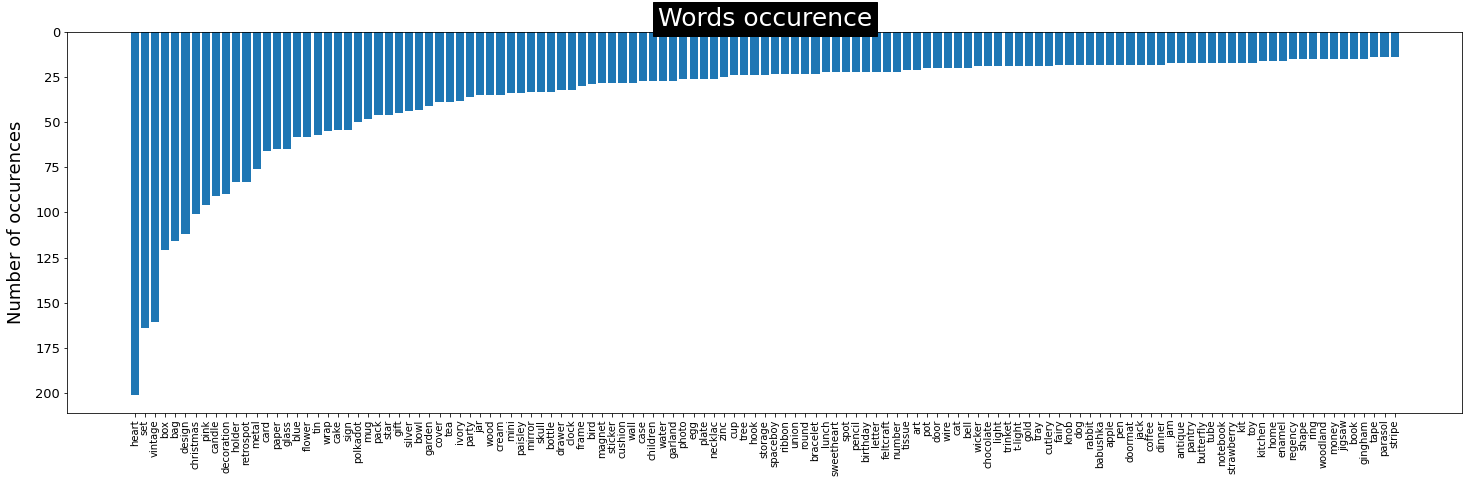

In [48]:
listing = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(25, 7))
# x_axis = [i[1] if n//2 == 0 else '' for n,i in enumerate(listing[:125])]
x_axis = [i[1] for i in listing[:125]]

y_axis = [k for k,i in enumerate(listing[:125])]
y_label = [i[0] for i in listing[:125]]
plt.xticks(fontsize = 10,rotation=90)
plt.yticks(fontsize = 13)
plt.xticks(y_axis, y_label)
plt.ylabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.bar(y_axis, x_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

### Define product categories


In [95]:
# For the sake of simplicity, only keep key words with count > 13.  Remove unmeaningful key words such as color or tag.
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse = True)
print('Reserved key words:', len(list_products))

Reserved key words: 138


#### Encoding


In [63]:
list_products

array(['LUNCH BAG DOLLY GIRL DESIGN', 'LUNCH BAG SUKI DESIGN ',
       'LUNCH BAG CARS BLUE', ..., 'PRETTY HANGING QUILTED HEARTS',
       'HANGING JAM JAR T-LIGHT HOLDERS',
       '50CM METAL STRING WITH  7 CLIPS'], dtype=object)

In [79]:
df_cleaned.head(5)

,order_ID,inventory_ID,desc,amount,order_date,unit_price,customer_ID,country,cancelled_order,total_price
19,559519,22662,LUNCH BAG DOLLY GIRL DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
20,559519,22383,LUNCH BAG SUKI DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
21,559519,20728,LUNCH BAG CARS BLUE,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
22,559519,22382,LUNCH BAG SPACEBOY DESIGN,150,2011-07-08 16:17:00,1.45,17353.0,United Kingdom,0,217.50
98,559523,23164,REGENCY CAKE SLICE,1,2011-07-08 17:19:00,4.95,13955.0,United Kingdom,0,4.95


In [96]:
# Build X matrix of product and key word
liste_products = df_cleaned['desc'].unique()
#print(liste_products[0:2])
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_products))
#print(X[0:1])

In [97]:
X

,heart,set,vintage,box,bag,design,christmas,candle,decoration,holder,...,colour,biscuit,wooden,hanger,hand,cabinet,bathroom,easter,warmer,bunny
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2631,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2632,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2633,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [98]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    #print(i)
    #print(col)
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_products):
    prix = df_cleaned[ df_cleaned['desc'] == prod]['unit_price'].mean()
    #print (prix)
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [99]:
X

,heart,set,vintage,box,bag,design,christmas,candle,decoration,holder,...,bathroom,easter,warmer,bunny,0<.<1,1<.<2,2<.<3,3<.<5,5<.<10,.>10
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2631,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2632,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2633,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [100]:
print("{:<8} {:<20} \n".format('scope', 'product amount') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

scope    product amount       
--------------------
0<.<1       764                 
1<.<2       694                 
2<.<3       435                 
3<.<5       375                 
5<.<10      270                 
.>10        97                  


#### Product clustering with Kmeans

In [101]:
matrix = X.values
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.12303914170422721
For n_clusters = 4 The average silhouette_score is : 0.14728415303029416
For n_clusters = 5 The average silhouette_score is : 0.16489907166839904
For n_clusters = 6 The average silhouette_score is : 0.16439513844107595
For n_clusters = 7 The average silhouette_score is : 0.16703018651347806
For n_clusters = 8 The average silhouette_score is : 0.1607366021581698
For n_clusters = 9 The average silhouette_score is : 0.14522240374868317


In [102]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.16489907166839904


#### Description of clusters


In [103]:
pd.Series(clusters).value_counts()

1    764
0    694
2    435
3    375
4    367
dtype: int64

Silhouette intra-cluster score

In [104]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    #plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        
        # Get silhounette score and sort
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # color = cm.spectral(float(i) / n_clusters) facecolor=color, edgecolor=color,       
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.8)
        
        # Mark silhouette score chart
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
       
        # calculate new y_lower for the next chart
        y_lower = y_upper + 10  

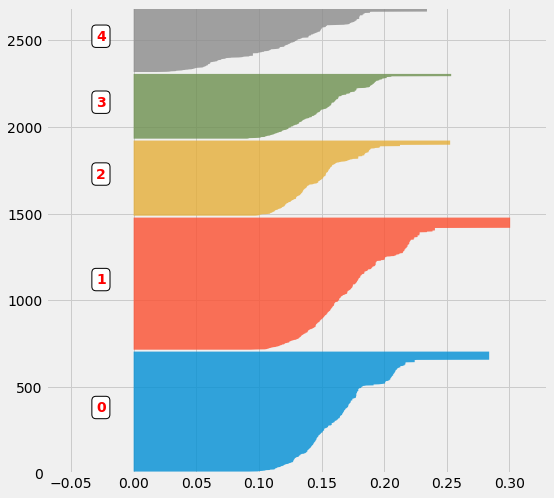

In [105]:
# Define silhouette score
sample_silhouette_values = silhouette_samples(matrix, clusters)

# Visualize silhouette score
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

Word cloud

In [122]:
liste = pd.DataFrame(liste_products)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

In [123]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

           

PCA

In [124]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

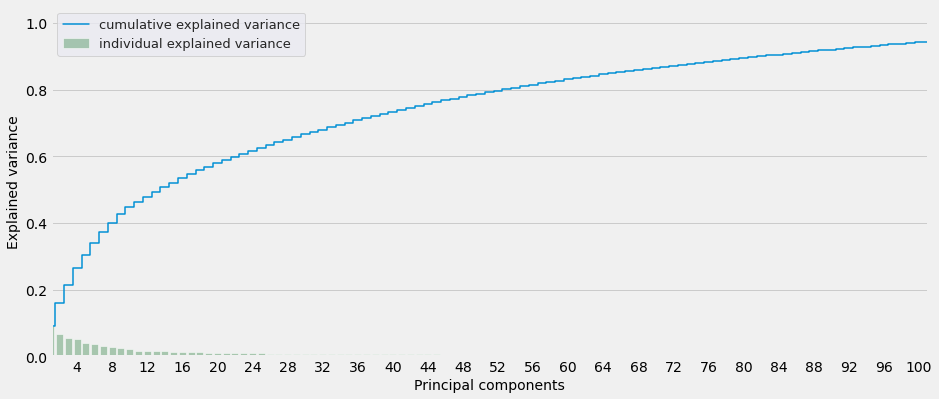

In [125]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%4 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [126]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

In [127]:
mat

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,cluster
0,-0.732460,-0.390150,-0.415628,0.327495,0.195509,-0.335700,-1.071034,0.514269,0.337244,0.428327,...,-0.019787,0.027249,-0.010640,0.004401,0.066398,-0.117667,0.009682,-0.056743,0.000823,0
1,-0.732460,-0.390150,-0.415628,0.327495,0.195509,-0.335700,-1.071034,0.514269,0.337244,0.428327,...,-0.019787,0.027249,-0.010640,0.004401,0.066398,-0.117667,0.009682,-0.056743,0.000823,0
2,-0.690935,-0.424504,-0.299514,0.114603,0.098407,-0.015443,-0.114689,-0.174064,-0.124511,0.310164,...,0.012613,0.024086,-0.042997,-0.054624,0.081769,-0.108996,-0.005315,-0.107852,0.016751,0
3,-0.734500,-0.394030,-0.427047,0.327404,0.198385,-0.350724,-1.082921,0.531552,0.336417,0.421737,...,-0.077443,0.013557,-0.019867,-0.037824,-0.038624,-0.189511,0.193138,-0.022941,0.079620,0
4,-0.067844,0.451251,0.027571,-0.784208,0.142070,-0.291106,-0.099919,-0.123996,-0.002612,-0.055263,...,0.007523,-0.034589,-0.027868,-0.092922,0.049330,-0.013465,-0.001951,-0.031490,-0.052552,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,-0.003058,0.242514,-0.133326,-0.183282,-0.752606,0.510747,-0.026591,-0.011254,-0.003528,0.159955,...,-0.002289,-0.119862,0.075608,-0.060698,-0.046942,0.004318,-0.013913,-0.112647,-0.020326,4
2631,-0.110787,0.262202,-0.185992,-0.145344,-0.118613,-0.187272,0.599760,0.703197,-0.420537,0.714577,...,0.016522,-0.013826,0.040386,0.049575,-0.021582,-0.220136,0.131476,-0.023851,0.064096,4
2632,0.690373,-0.580602,1.147488,0.081575,0.057870,0.099929,-0.113313,0.084835,-0.121152,0.043341,...,0.047483,-0.030975,-0.092078,0.029993,0.117172,-0.017125,-0.002162,0.004109,0.010170,1
2633,0.729123,-0.265320,-0.004709,0.175003,-0.073041,-0.237723,0.672882,-0.351494,1.482124,0.221558,...,-0.143823,-0.186796,0.116748,-0.340094,0.041225,-0.050779,-0.295606,0.656230,-0.298351,1


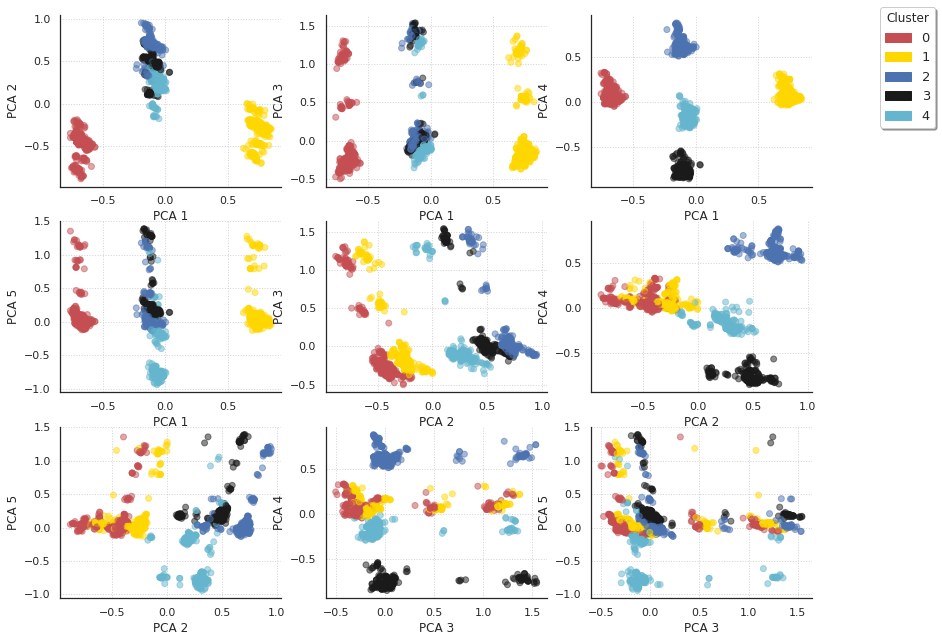

In [128]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 5):   
        increment += 1
        ax = fig.add_subplot(3,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

# plt.tight_layout()

## 客户类别

### Data pre-processing

In [131]:
corresp = dict()
for key, val in zip (liste_products, clusters):
    corresp[key] = val 

df_cleaned['categ_product'] = df_cleaned.loc[:, 'desc'].map(corresp)
df_cleaned[['order_ID', 'desc', 
            'categ_product']][:5]

,order_ID,desc,categ_product
19,559519,LUNCH BAG DOLLY GIRL DESIGN,0
20,559519,LUNCH BAG SUKI DESIGN,0
21,559519,LUNCH BAG CARS BLUE,0
22,559519,LUNCH BAG SPACEBOY DESIGN,0
98,559523,REGENCY CAKE SLICE,3


#### Product grouping

In [132]:
# Add new variable: categ_N
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['unit_price'] * (df_temp['amount'] - df_temp['cancelled_order'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)


df_cleaned[['order_ID', 'desc', 'categ_product', 
            'categ_0', 'categ_1', 'categ_2', 
            'categ_3','categ_4']][:10]

,order_ID,desc,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
19,559519,LUNCH BAG DOLLY GIRL DESIGN,0,217.50,0.00,0.0,0.00,0.00
20,559519,LUNCH BAG SUKI DESIGN,0,217.50,0.00,0.0,0.00,0.00
21,559519,LUNCH BAG CARS BLUE,0,217.50,0.00,0.0,0.00,0.00
22,559519,LUNCH BAG SPACEBOY DESIGN,0,217.50,0.00,0.0,0.00,0.00
98,559523,REGENCY CAKE SLICE,3,0.00,0.00,0.0,4.95,0.00
99,559523,CAKE STAND 3 TIER MAGIC GARDEN,4,0.00,0.00,0.0,0.00,12.75
100,559523,SET OF 3 HEART COOKIE CUTTERS,0,1.25,0.00,0.0,0.00,0.00
101,559523,72 SWEETHEART FAIRY CAKE CASES,1,0.00,0.55,0.0,0.00,0.00
102,559523,TOAST ITS - I LOVE YOU,0,1.25,0.00,0.0,0.00,0.00
103,559523,RED FLOCK LOVE HEART PHOTO FRAME,1,0.00,0.78,0.0,0.00,0.00


In [133]:
# set up basket_price
# purchase/customer/order
temp = df_cleaned.groupby(by=['customer_ID', 'order_ID'], as_index=False)['total_price'].sum()
basket_price = temp.rename(columns = {'total_price':'basket_price'})

# order/prodcut category %
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['customer_ID', 'order_ID'], as_index=False).sum()[col]
    basket_price.loc[:, col] = temp 

# order date

df_cleaned['order_date_int'] = df_cleaned['order_date'].astype('int64')
temp = df_cleaned.groupby(by=['customer_ID', 'order_ID'], as_index=False)['order_date_int'].mean()
df_cleaned.drop('order_date_int', axis = 1, inplace = True)
basket_price.loc[:, 'order_date'] = pd.to_datetime(temp['order_date_int'])

# selection of significant entries:
basket_price = basket_price[basket_price['basket_price'] > 0]
basket_price.sort_values('customer_ID', ascending = True)[:5]

,customer_ID,order_ID,basket_price,categ_0,categ_1,categ_2,categ_3,categ_4,order_date
0,12347.0,562032,584.91,109.70,61.30,119.7,158.16,136.05,2011-08-02 08:48:00
1,12358.0,559707,484.86,50.76,0.00,17.7,15.00,401.40,2011-07-12 10:04:00
2,12360.0,563749,534.70,67.04,47.36,222.7,49.80,147.80,2011-08-19 10:10:00
3,12362.0,563037,451.35,278.45,51.00,68.4,8.50,45.00,2011-08-11 15:02:00
4,12363.0,563947,252.90,34.80,19.80,168.6,29.70,0.00,2011-08-22 10:18:00


#### Slice data by time series

In [134]:
print(basket_price['order_date'].min(), '->',  basket_price['order_date'].max())

2011-07-08 16:17:00 -> 2011-08-31 15:30:00


In [135]:
basket_price

,customer_ID,order_ID,basket_price,categ_0,categ_1,categ_2,categ_3,categ_4,order_date
0,12347.0,562032,584.91,109.70,61.30,119.70,158.16,136.05,2011-08-02 08:48:00
1,12358.0,559707,484.86,50.76,0.00,17.70,15.00,401.40,2011-07-12 10:04:00
2,12360.0,563749,534.70,67.04,47.36,222.70,49.80,147.80,2011-08-19 10:10:00
3,12362.0,563037,451.35,278.45,51.00,68.40,8.50,45.00,2011-08-11 15:02:00
4,12363.0,563947,252.90,34.80,19.80,168.60,29.70,0.00,2011-08-22 10:18:00
...,...,...,...,...,...,...,...,...,...
2262,18272.0,559813,753.66,246.60,63.96,150.90,259.20,33.00,2011-07-12 15:42:00
2263,18272.0,563680,372.25,142.00,77.40,115.50,37.35,0.00,2011-08-18 12:06:00
2264,18282.0,562525,98.76,0.00,19.11,40.65,0.00,39.00,2011-08-05 13:35:00
2265,18283.0,560025,137.39,51.45,27.53,41.81,16.60,0.00,2011-07-14 13:00:00


In [136]:
# select datasets of 12 months for training purpose
basket_price['order_date'] = basket_price['order_date'].map(lambda x:x.to_pydatetime().date())

set_entrainement = basket_price[basket_price['order_date'] < datetime.date(2011,10,1)]
set_test         = basket_price[basket_price['order_date'] >= datetime.date(2011,10,1)]
basket_price = set_entrainement.copy(deep = True)

In [137]:
set_entrainement

,customer_ID,order_ID,basket_price,categ_0,categ_1,categ_2,categ_3,categ_4,order_date
0,12347.0,562032,584.91,109.70,61.30,119.70,158.16,136.05,2011-08-02
1,12358.0,559707,484.86,50.76,0.00,17.70,15.00,401.40,2011-07-12
2,12360.0,563749,534.70,67.04,47.36,222.70,49.80,147.80,2011-08-19
3,12362.0,563037,451.35,278.45,51.00,68.40,8.50,45.00,2011-08-11
4,12363.0,563947,252.90,34.80,19.80,168.60,29.70,0.00,2011-08-22
...,...,...,...,...,...,...,...,...,...
2262,18272.0,559813,753.66,246.60,63.96,150.90,259.20,33.00,2011-07-12
2263,18272.0,563680,372.25,142.00,77.40,115.50,37.35,0.00,2011-08-18
2264,18282.0,562525,98.76,0.00,19.11,40.65,0.00,39.00,2011-08-05
2265,18283.0,560025,137.39,51.45,27.53,41.81,16.60,0.00,2011-07-14


#### Customer order combo

In [138]:
# Transaction of basket by customer
transactions_per_user=basket_price.groupby(
    by=['customer_ID'])['basket_price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['customer_ID'])[col].sum() / \
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['customer_ID'])['categ_0'].sum()
transactions_per_user.sort_values('customer_ID', ascending = True)[:5]

,customer_ID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,1,584.91,584.91,584.91,584.91,18.755022,10.480245,20.464687,27.040057,23.259989
1,12358.0,1,484.86,484.86,484.86,484.86,10.469001,0.000000,3.650538,3.093677,82.786784
2,12360.0,1,534.70,534.70,534.70,534.70,12.537872,8.857303,41.649523,9.313634,27.641668
3,12362.0,1,451.35,451.35,451.35,451.35,61.692700,11.299435,15.154536,1.883239,9.970090
4,12363.0,1,252.90,252.90,252.90,252.90,13.760380,7.829181,66.666667,11.743772,0.000000


In [139]:
# Add 2 new variables: first_registration, last_purchase
last_date = basket_price['order_date'].max()

first_registration = pd.DataFrame(basket_price.groupby(by=['order_ID'])['order_date'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['order_ID'])['order_date'].max())

test  = first_registration.applymap(lambda x:(last_date - x).days)
test2 = last_purchase.applymap(lambda x:(last_date - x).days)

transactions_per_user.loc[:, 'Last purchase'] = test2.reset_index(drop = False)['order_date']
transactions_per_user.loc[:, 'First purchase'] = test.reset_index(drop = False)['order_date']

transactions_per_user[:5]

,customer_ID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,Last purchase,First purchase
0,12347.0,1,584.91,584.91,584.91,584.91,18.755022,10.480245,20.464687,27.040057,23.259989,54,54
1,12358.0,1,484.86,484.86,484.86,484.86,10.469001,0.000000,3.650538,3.093677,82.786784,54,54
2,12360.0,1,534.70,534.70,534.70,534.70,12.537872,8.857303,41.649523,9.313634,27.641668,52,52
3,12362.0,1,451.35,451.35,451.35,451.35,61.692700,11.299435,15.154536,1.883239,9.970090,52,52
4,12363.0,1,252.90,252.90,252.90,252.90,13.760380,7.829181,66.666667,11.743772,0.000000,52,52


In [141]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("Number of customer with only 1 purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))
# Specific maketing strategy can be developed for this group of customers

Number of customer with only 1 purchase: 909/1363  (66.69%)


---
### Customer category

#### Encoding

In [142]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].values

In [143]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variable mean: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variable mean: 
------------------------------------------------------------------------------------------
 [  1.64490095 348.44760161 553.90801247 427.60027646  27.41164892
  15.48999288  21.17277054  16.35618616  19.56958663]


In [144]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

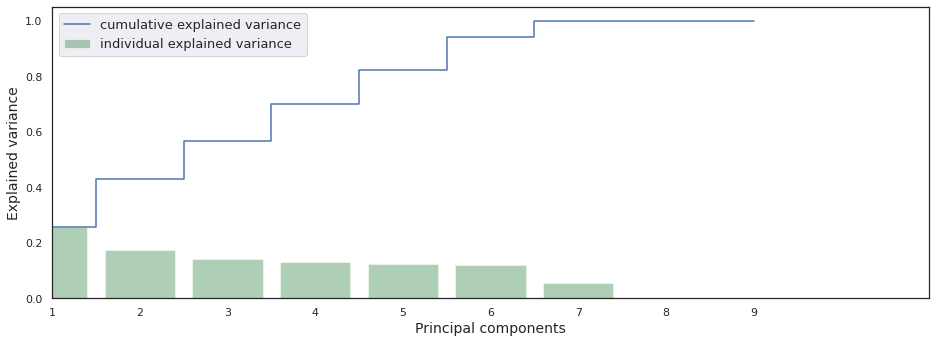

In [145]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

-----
#### Customer clustering

In [146]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('silhouette score: {:<.3f}'.format(silhouette_avg))

silhouette score: 0.209


In [147]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['amount']).T

,4,5,0,1,10,3,8,7,9,2,6
amount,351,262,172,160,115,108,99,57,19,14,6


PCA

In [148]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

In [149]:
mat

,0,1,2,3,4,5,cluster
0,0.494352,0.619324,-0.242394,-0.550095,0.478521,0.192463,4
1,0.273648,2.195455,-1.454488,-0.458461,-1.687011,-1.415028,10
2,0.379447,0.697161,0.883336,-0.901550,-0.511018,-0.111854,0
3,-0.051512,-1.504634,-0.223411,-0.276296,0.148585,-1.301757,1
4,-0.365371,0.179024,2.499562,-0.900673,0.154544,0.319238,0
...,...,...,...,...,...,...,...
1358,-1.083225,-2.439558,-0.941576,0.128077,-0.151132,-0.423708,1
1359,-0.963390,3.035058,-1.638444,-0.080684,-2.305305,-1.466478,10
1360,0.319460,-0.396088,0.295725,0.282483,0.899142,0.186815,4
1361,-0.872166,1.080172,0.855752,-0.660878,-1.558187,0.243649,0


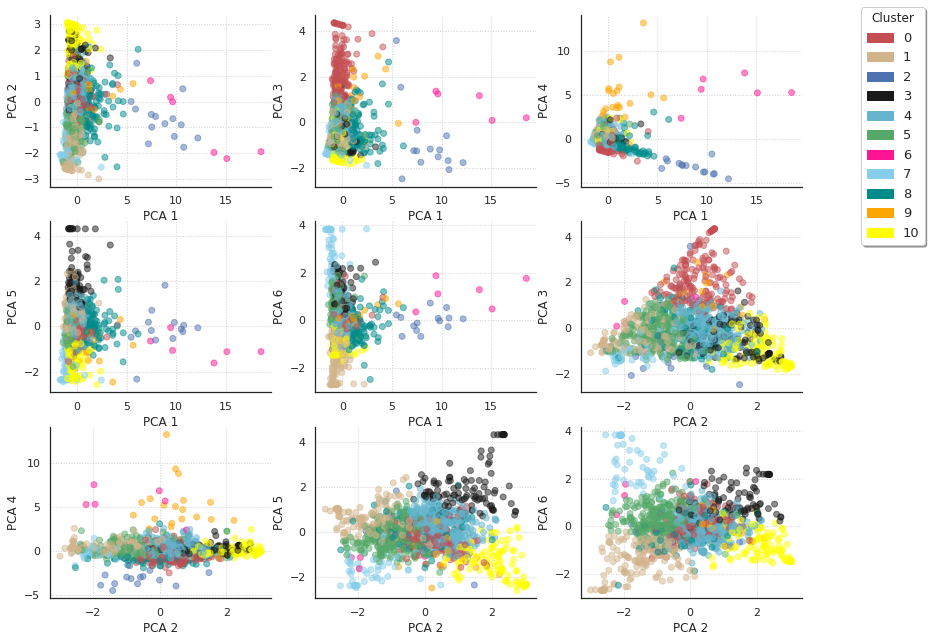

In [150]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan',
                   9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(3,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', 
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure) #facecolor = 'lightgrey',

plt.tight_layout()

silhouette intra-cluster

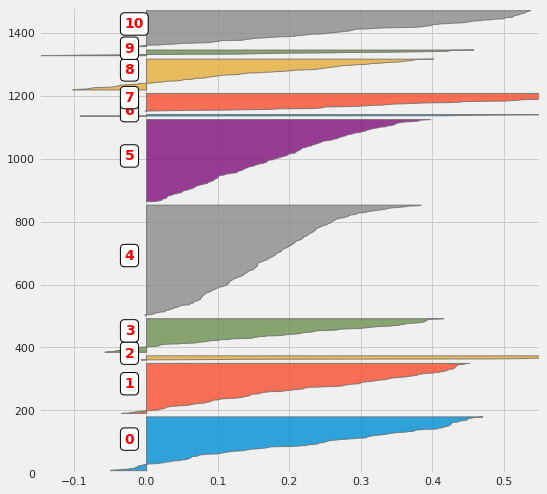

In [151]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silhouette scores 
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, 
                           clusters_clients)

Customer Profile

In [152]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [153]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('customer_ID', axis = 1, inplace = True)
print('amount of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

amount of customers: 1363


In [154]:
merged_df

,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,Last purchase,First purchase,size
cluster,,,,,,,,,,,,,
7.0,1.210526,220.616140,238.976316,229.873904,273.478421,10.168399,76.942287,4.628131,3.164032,5.097151,35.807018,35.807018,57
1.0,1.425000,251.610819,299.369569,275.954475,396.622506,67.158298,8.437292,9.439784,7.139835,7.824790,36.956250,36.956250,160
3.0,1.351852,265.720093,342.603241,303.499173,429.255000,11.864960,6.871803,12.243601,56.534395,12.485241,35.962963,35.962963,108
10.0,1.417391,234.187478,341.965826,286.254580,440.130174,6.684457,5.010813,8.089379,8.972382,71.242970,36.600000,36.600000,115
5.0,1.538168,274.065153,375.674962,320.603161,497.506221,34.663644,29.157346,15.934543,10.948775,9.295691,37.019084,37.019084,262
0.0,1.494186,268.613605,373.961977,320.448056,533.001105,15.067387,8.510648,59.568444,6.621316,10.232205,37.087209,37.087209,172
4.0,1.686610,282.207977,417.429231,347.902155,580.016382,23.659896,9.642045,21.021290,21.483719,24.193051,37.014245,37.014245,351
8.0,1.282828,988.201010,1273.559192,1091.479190,1486.595455,31.193880,11.538667,20.787351,15.880105,20.599997,39.737374,39.737374,99
2.0,1.214286,3455.398571,3631.827857,3563.011548,4403.375000,22.109805,11.948129,26.536198,15.328398,24.084166,39.928571,39.928571,14


In [155]:
merged_df[merged_df['categ_0'] > 45].index.values[0]

1.0

In [156]:
merged_df[merged_df['categ_1'] > 45].index.values[0]

7.0

In [157]:
liste_index = []
for i in range(5):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] > 45].index.values[0])

liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]

merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
display(merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0',
                   'categ_1', 'categ_2', 'categ_3', 'categ_4', 'size']])

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
0,1.0,1.425000,251.610819,299.369569,275.954475,396.622506,67.158298,8.437292,9.439784,7.139835,7.824790,160
1,7.0,1.210526,220.616140,238.976316,229.873904,273.478421,10.168399,76.942287,4.628131,3.164032,5.097151,57
2,0.0,1.494186,268.613605,373.961977,320.448056,533.001105,15.067387,8.510648,59.568444,6.621316,10.232205,172
3,3.0,1.351852,265.720093,342.603241,303.499173,429.255000,11.864960,6.871803,12.243601,56.534395,12.485241,108
4,10.0,1.417391,234.187478,341.965826,286.254580,440.130174,6.684457,5.010813,8.089379,8.972382,71.242970,115
5,5.0,1.538168,274.065153,375.674962,320.603161,497.506221,34.663644,29.157346,15.934543,10.948775,9.295691,262
6,4.0,1.686610,282.207977,417.429231,347.902155,580.016382,23.659896,9.642045,21.021290,21.483719,24.193051,351
7,8.0,1.282828,988.201010,1273.559192,1091.479190,1486.595455,31.193880,11.538667,20.787351,15.880105,20.599997,99
8,2.0,1.214286,3455.398571,3631.827857,3563.011548,4403.375000,22.109805,11.948129,26.536198,15.328398,24.084166,14
9,9.0,10.842105,133.097368,1882.361053,574.733910,5860.898947,23.449414,10.922987,24.467868,18.815587,22.352490,19


Customer profile visualization

In [158]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[0:-1]]
            
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


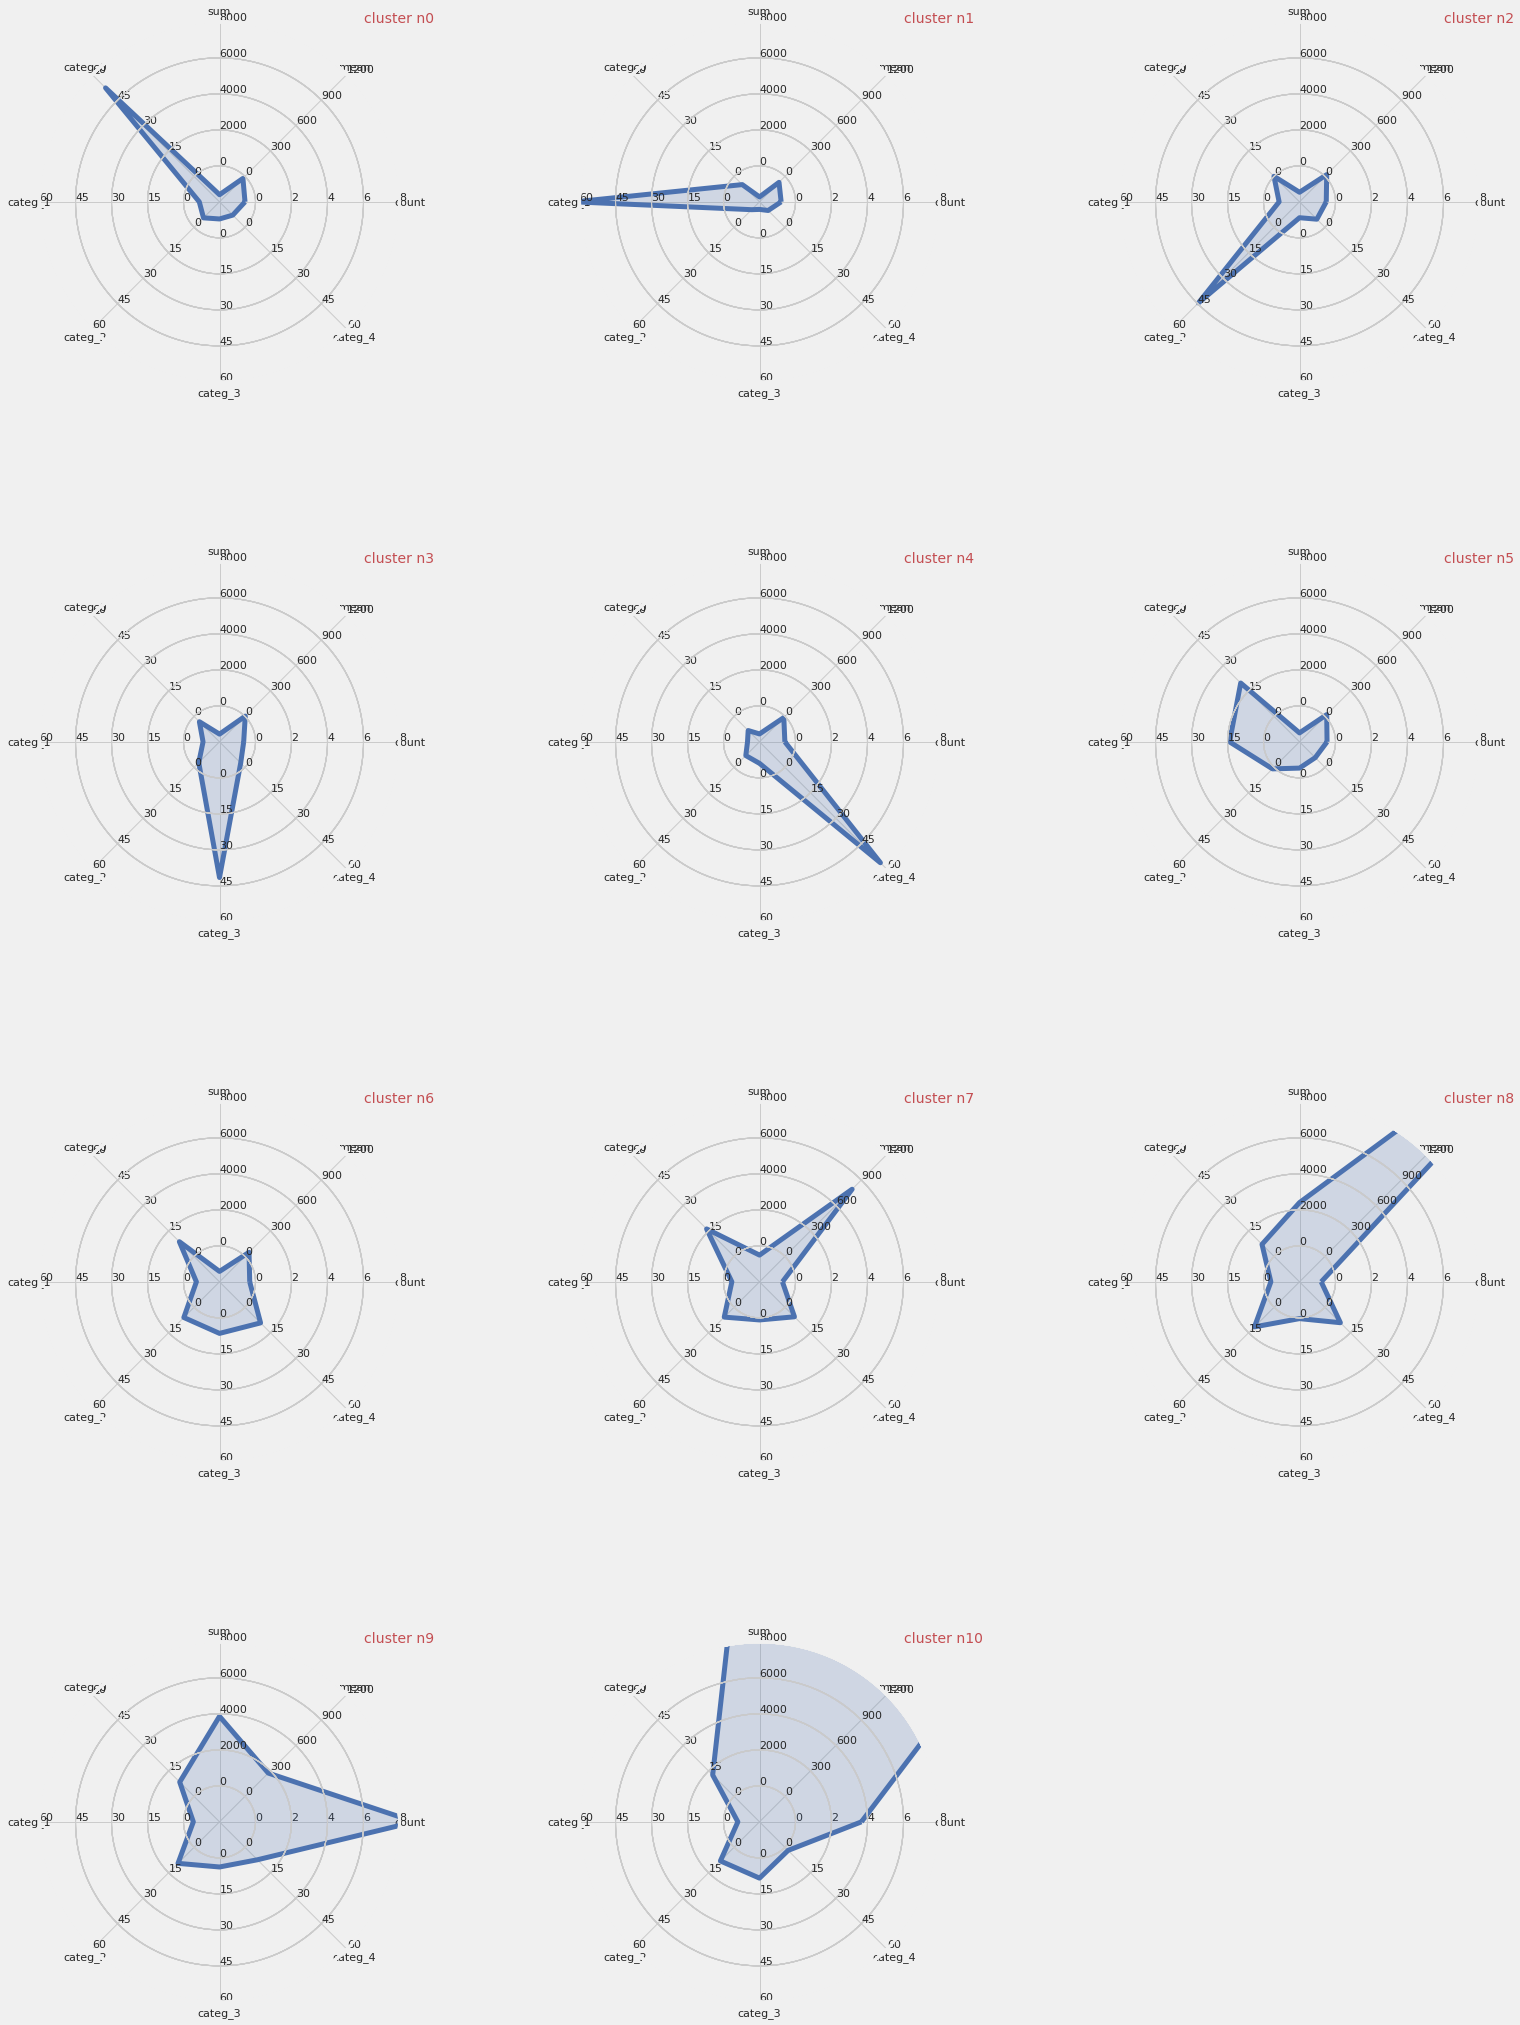

In [159]:
fig = plt.figure(figsize=(50,50))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (0.3/i_cols), (0.3/i_rows)
# size_x, size_y = (i_cols), (i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])  
    #print (data)
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=5.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster n{}'.format(index[ind]), color = 'r')
    ind += 1 


## Customer classification

In [160]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

In [161]:
selected_customers.head()

,customer_ID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,Last purchase,First purchase,cluster
0,12347.0,1,584.91,584.91,584.91,584.91,18.755022,10.480245,20.464687,27.040057,23.259989,54,54,4
1,12358.0,1,484.86,484.86,484.86,484.86,10.469001,0.000000,3.650538,3.093677,82.786784,54,54,10
2,12360.0,1,534.70,534.70,534.70,534.70,12.537872,8.857303,41.649523,9.313634,27.641668,52,52,0
3,12362.0,1,451.35,451.35,451.35,451.35,61.692700,11.299435,15.154536,1.883239,9.970090,52,52,1
4,12363.0,1,252.90,252.90,252.90,252.90,13.760380,7.829181,66.666667,11.743772,0.000000,52,52,0


In [162]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [163]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

___
### SVC


In [164]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [165]:
svc.grid_fit(X = X_train, Y = Y_train)

In [166]:
svc.grid_predict(X_test, Y_test)

Precision: 62.64 % 


___
#### Confusion matrix

In [167]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
   
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


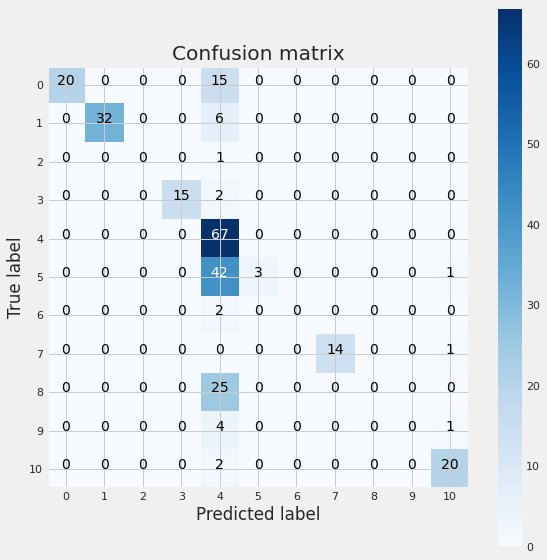

In [168]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Confusion matrix')


----------------
#### Learning rate

In [169]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize=(12,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

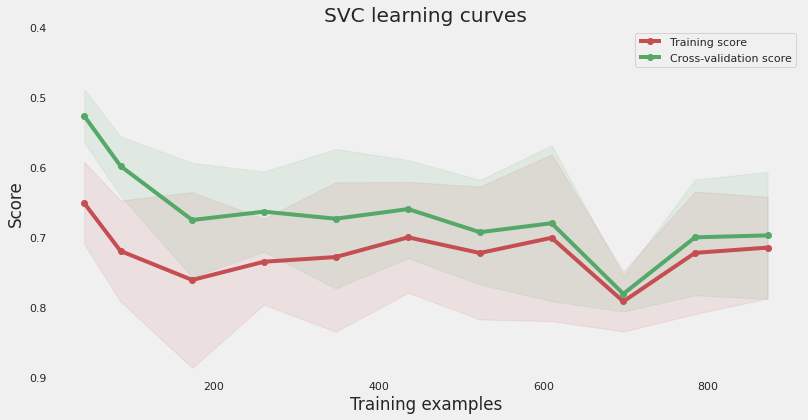

In [170]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", 
                        X_train, Y_train, ylim = [0.9, 0.4],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

## Modified method

### Logistic Regression


In [172]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 90.48 % 


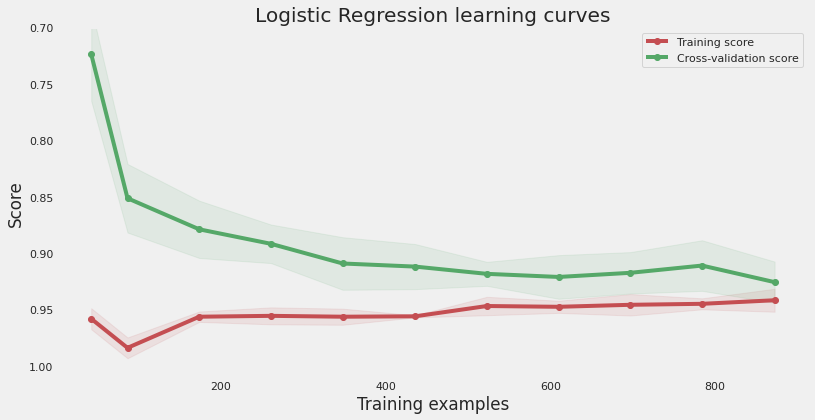

In [173]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

----
### k-Nearest Neighbors

In [174]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 78.75 % 


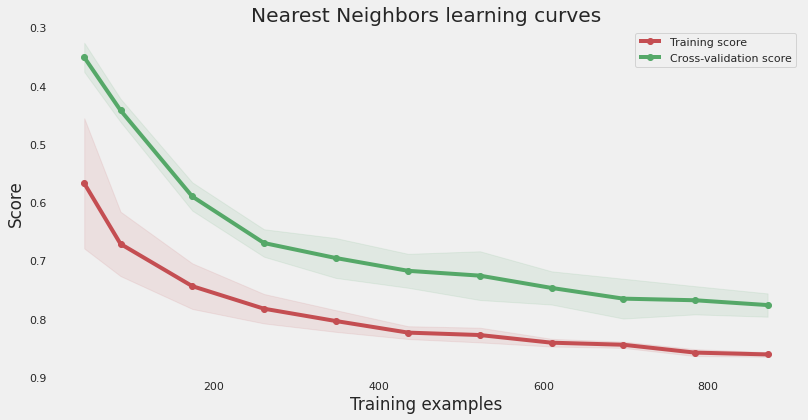

In [175]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [0.9, 0.3], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Decision Tree

In [176]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 84.98 % 


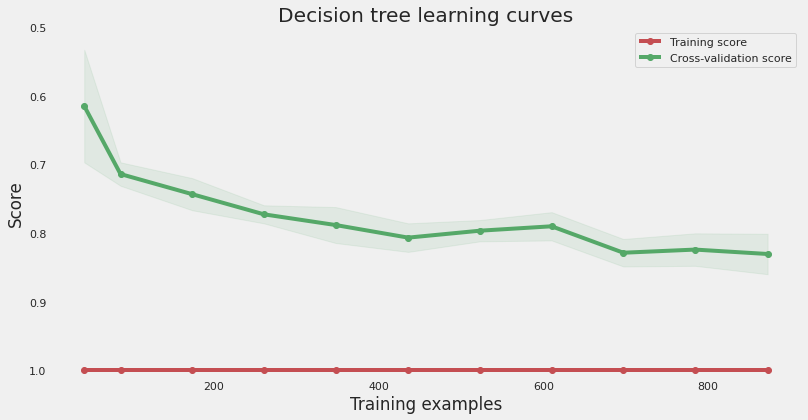

In [177]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.5], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Random Forest

In [178]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 91.21 % 


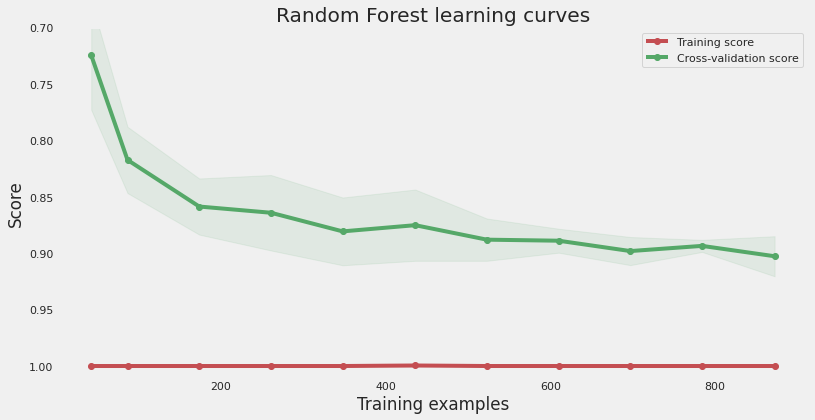

In [179]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### AdaBoost Classifier

In [180]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 37.00 % 


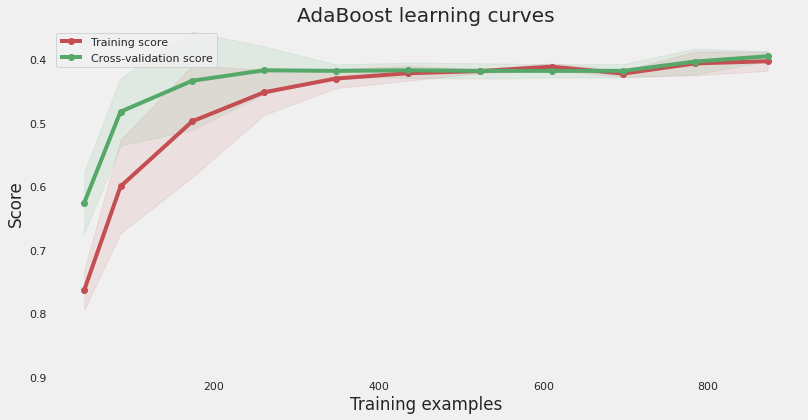

In [181]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [0.9, 0.35], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

###  Gradient Boosting Classifier

In [182]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 89.38 % 


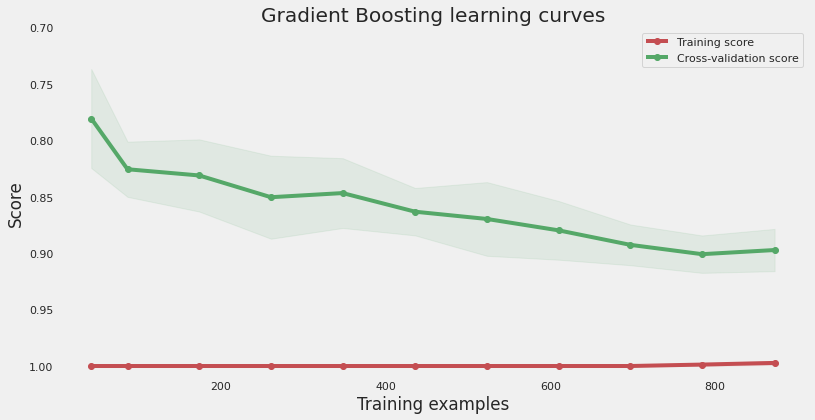

In [183]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


## Voting classifier

In [184]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

In [186]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft')    

In [187]:
votingC = votingC.fit(X_train, Y_train)

In [188]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 91.94 % 


## Testing predictions

In [192]:
basket_price = set_test.copy(deep = True)

In [193]:
transactions_per_user=basket_price.groupby(by=['customer_ID'])['basket_price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['customer_ID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['customer_ID'])['categ_0'].sum()

#_______________________
# Correcting time range
transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('customer_ID', ascending = True)[:5]

,customer_ID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4


In [191]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
#_____________________________________________________________
matrix_test = transactions_per_user[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)
scaled_test_matrix

ValueError: ignored

In [194]:
Y = kmeans.predict(scaled_test_matrix)

NameError: ignored

In [195]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [196]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logostic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine


ValueError: ignored

In [ ]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 27.56 % 
